In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("Netflix Dataset.csv")

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
print("The Shape of Dataset ",df.shape)


The Shape of Dataset  (7789, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [8]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [9]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [10]:
# Null values in columns
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [11]:
print("Duplicate rows in dataset")
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Duplicate rows in dataset
Number of duplicate rows: 2


In [12]:
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Dataset shape after removing duplicates: (7787, 11)


In [14]:
df['Director'] = df['Director'].fillna("Not Available")
df['Cast'] = df['Cast'].fillna("Not Available")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")


In [15]:
# Drop records with missing Release_Date
df.dropna(subset=['Release_Date'], inplace=True)

In [17]:
# Strip extra spaces first
df['Release_Date'] = df['Release_Date'].str.strip()

# Convert to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', format='mixed')

# Extract year
df['Year'] = df['Release_Date'].dt.year


In [18]:
df['Month'] = df['Release_Date'].dt.month_name()
df['Day'] = df['Release_Date'].dt.day


In [19]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Year            0
Month           0
Day             0
dtype: int64

In [20]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day
0,s1,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,1


#### Distribution of Movies vs TV Shows

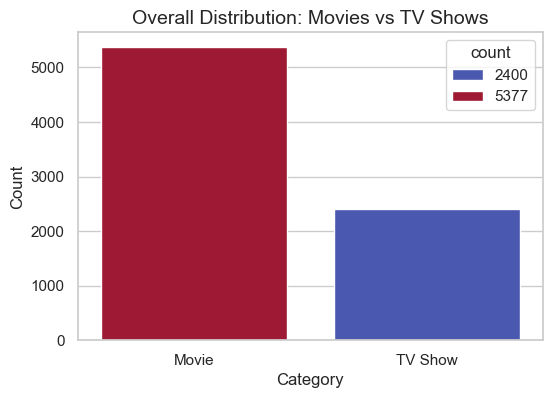

In [ ]:
# Count by category
category_count = df['Category'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=category_count.index,hue=category_count,y=category_count.values, palette='coolwarm')
plt.title("Overall Distribution: Movies vs TV Shows", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [28]:
df['Category'].unique()

array(['TV Show', 'Movie'], dtype=object)

#### Movies vs TV Shows Released Over the Years

<Figure size 1000x600 with 0 Axes>

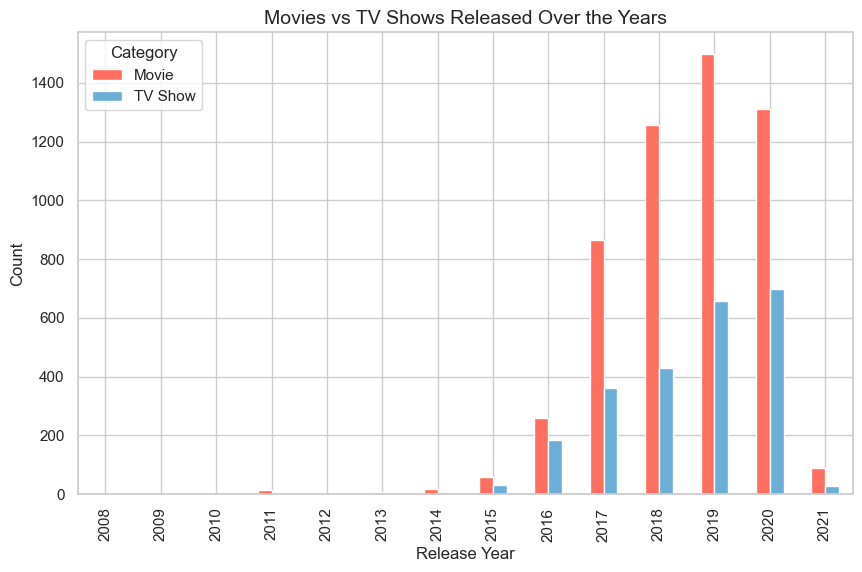

In [29]:
plt.figure(figsize=(10,6))
df.groupby(['Year', 'Category']).size().unstack().plot(kind='bar', figsize=(10,6), color=['#FF6F61','#6BAED6'])
plt.title("Movies vs TV Shows Released Over the Years", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Release Year")
plt.legend(title="Category")
plt.show()


In [31]:
from collections import Counter

# Split on commas and clean spaces
genre_split = df['Type'].apply(lambda x: [g.strip() for g in x.split(',')])

# Flatten all lists into one
all_genres = [genre for sublist in genre_split for genre in sublist]

# Count occurrences
genre_counts = Counter(all_genres).most_common(15)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

#### Top 10 Genres on Netflix

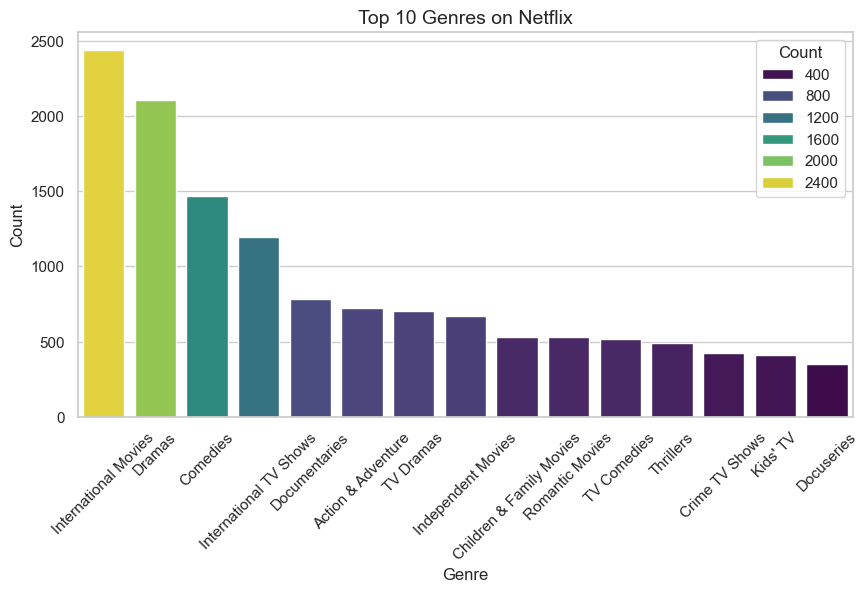

In [64]:
# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=genre_df, x='Genre',hue='Count', y='Count', palette='viridis')
plt.title("Top 10 Genres on Netflix", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Top 10 Countries Producing Netflix Content

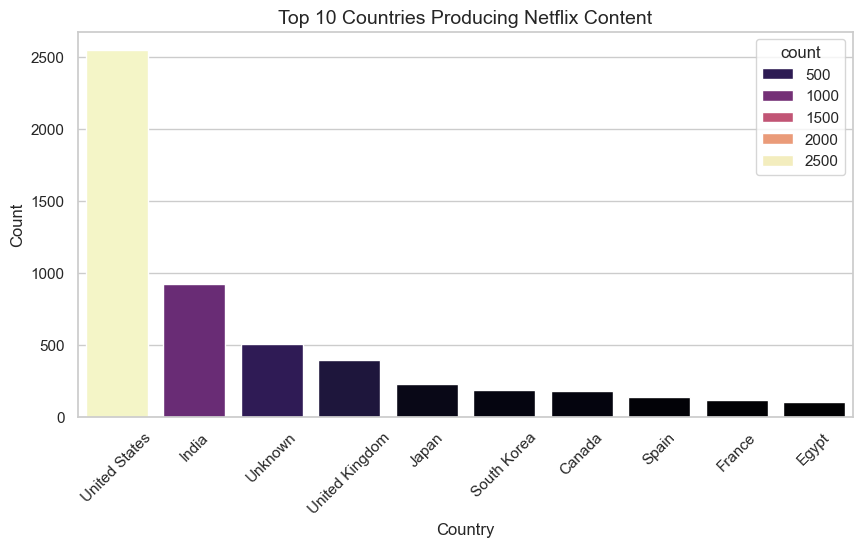

In [88]:
country_count = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(hue=country_count,x=country_count.index, y=country_count.values, palette='magma')
plt.title("Top 10 Countries Producing Netflix Content", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


#### Distribution of Content Ratings

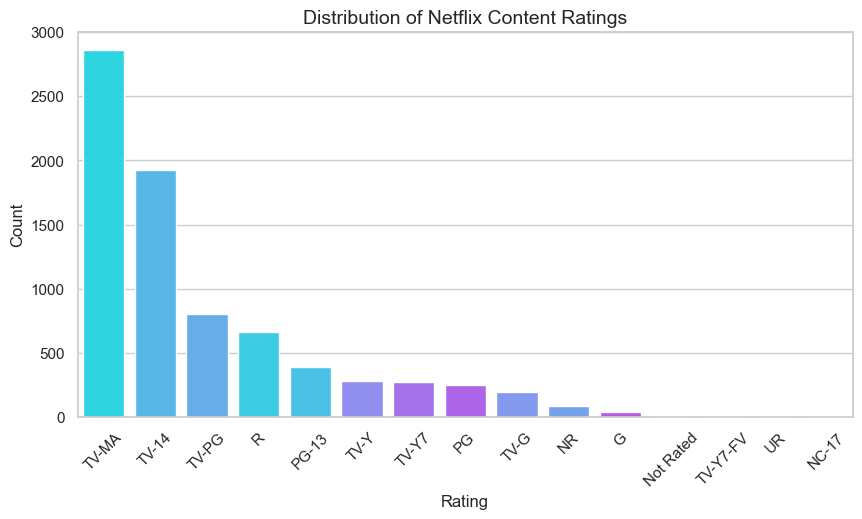

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating',hue='Rating', order=df['Rating'].value_counts().index, palette='cool')
plt.title("Distribution of Netflix Content Ratings", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


In [47]:
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

#### Netflix Content by Country and Category

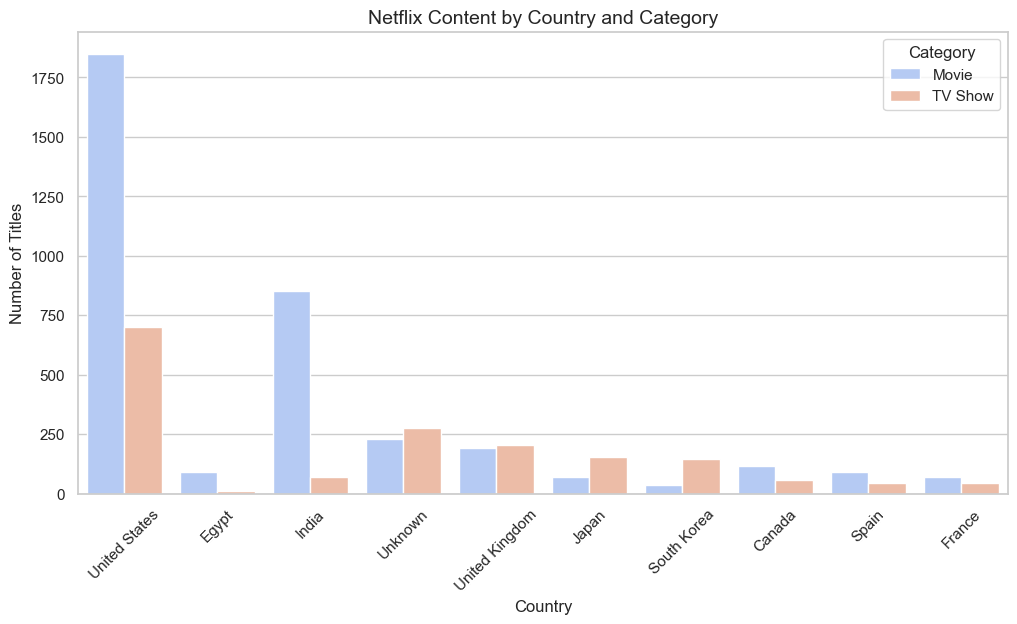

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_countries, x='Country', hue='Category', palette='coolwarm')
plt.title("Netflix Content by Country and Category", fontsize=14)
plt.ylabel("Number of Titles")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

#### Netflix Content Growth by Country Over the Years

<Figure size 1500x600 with 0 Axes>

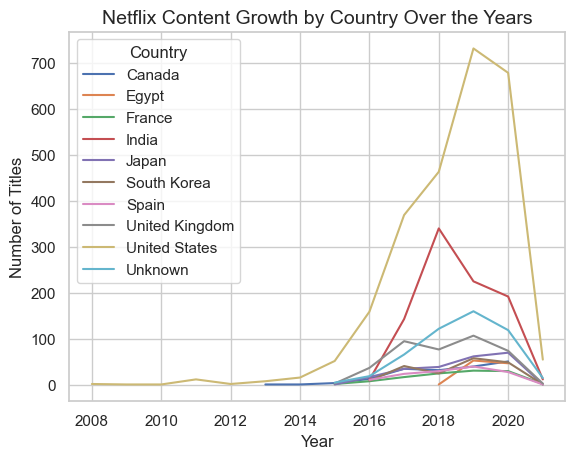

In [49]:
plt.figure(figsize=(15,6))
df_top_countries.groupby(['Year','Country']).size().unstack().plot()
plt.title("Netflix Content Growth by Country Over the Years", fontsize=14)
plt.ylabel("Number of Titles")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()


#### Genre Trends Over Years on Netflix

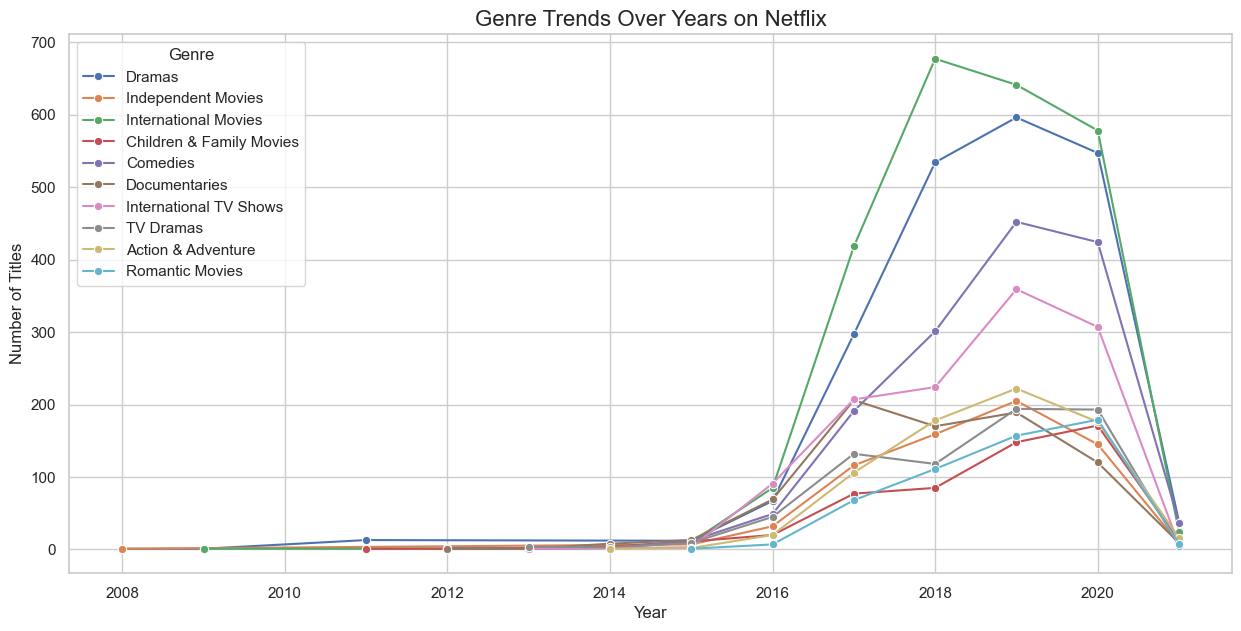

In [81]:
# Split genres
df_genres = df[['Year', 'Type']].dropna().copy()
df_genres['Type'] = df_genres['Type'].apply(lambda x: [g.strip() for g in x.split(',')])

df_exploded = df_genres.explode('Type')

# Count number of titles per Year and Genre
genre_year_count = df_exploded.groupby(['Year', 'Type']).size().reset_index(name='Count')

top_genres = df_exploded['Type'].value_counts().head(10).index
genre_year_count = genre_year_count[genre_year_count['Type'].isin(top_genres)]

plt.figure(figsize=(15,7))
sns.lineplot(data=genre_year_count, x='Year', y='Count', hue='Type', marker='o')
plt.title("Genre Trends Over Years on Netflix", fontsize=16)
plt.ylabel("Number of Titles")
plt.xlabel("Year")
plt.legend(title="Genre")
plt.show()

#### Stacked Genre Distribution Over Years

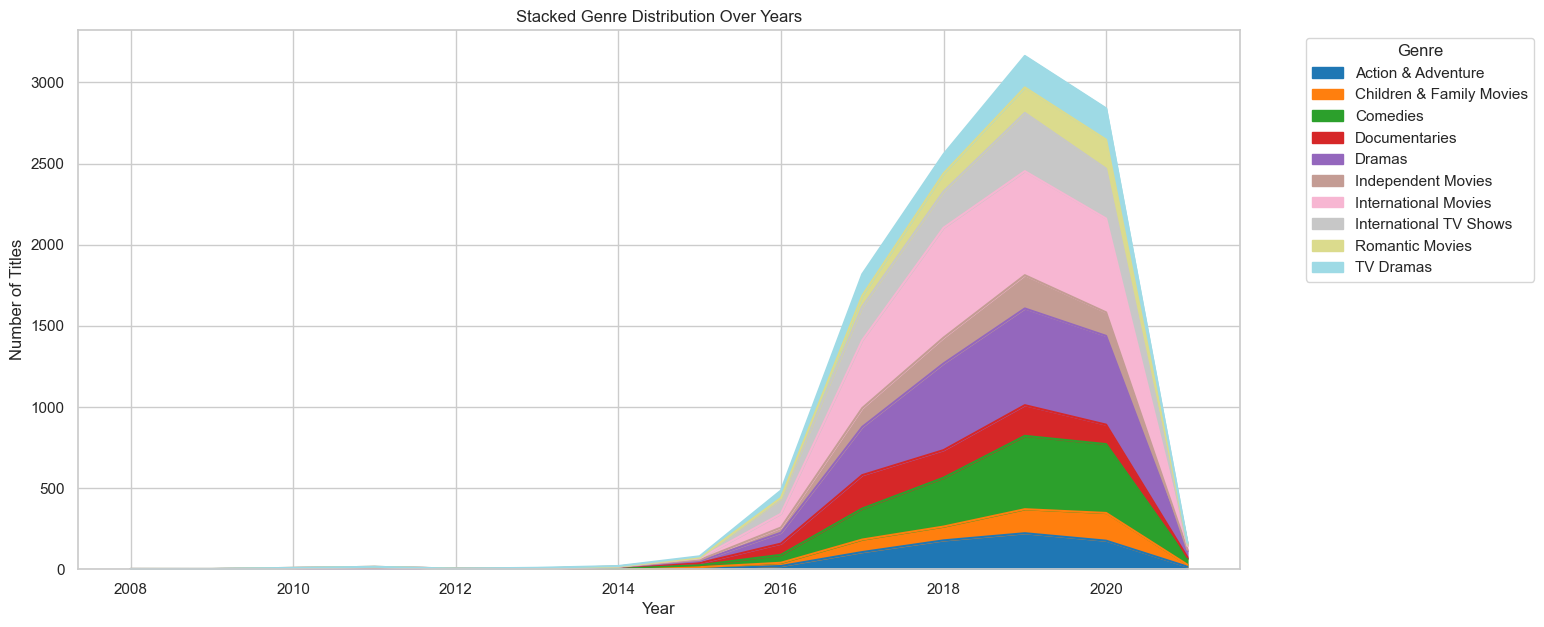

In [82]:
# Pivot for area chart
genre_pivot = genre_year_count.pivot(index='Year', columns='Type', values='Count').fillna(0)

# Stacked area
genre_pivot.plot(kind='area', stacked=True, figsize=(15,7), cmap='tab20')
plt.title("Stacked Genre Distribution Over Years")
plt.ylabel("Number of Titles")
plt.xlabel("Year")
plt.legend(title="Genre", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


#### Top 10 Cast Members by Number of Titles

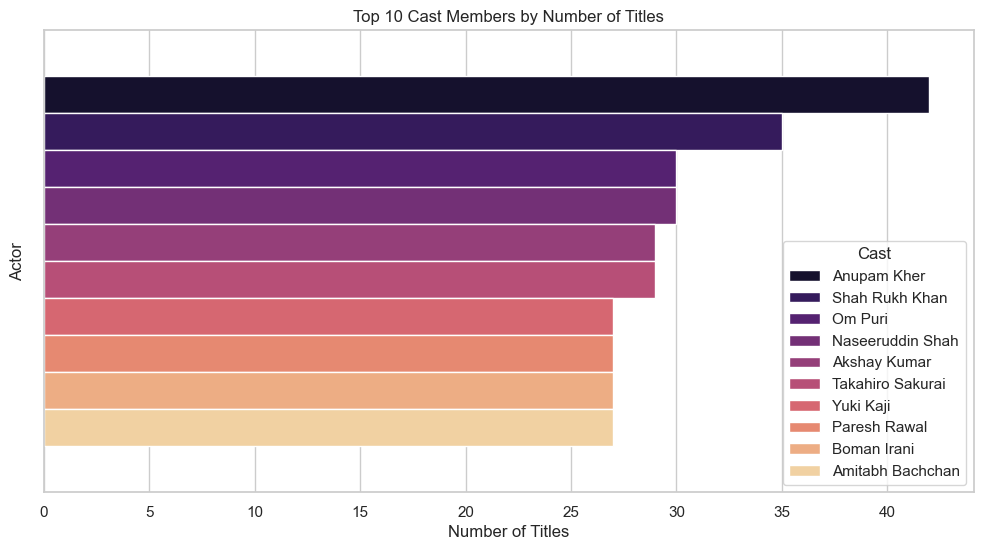

In [ ]:
df_cast = df[df['Cast'] != 'Not Available'].copy()
df_cast['Cast'] = df_cast['Cast'].apply(lambda x: [c.strip() for c in x.split(',')])
df_cast_exploded = df_cast.explode('Cast')

# Top 10 actors
top_cast = df_cast_exploded['Cast'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_cast.values, hue=top_cast.index, palette='magma')
plt.title("Top 10 Cast Members by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


#### Netflix Releases by Month

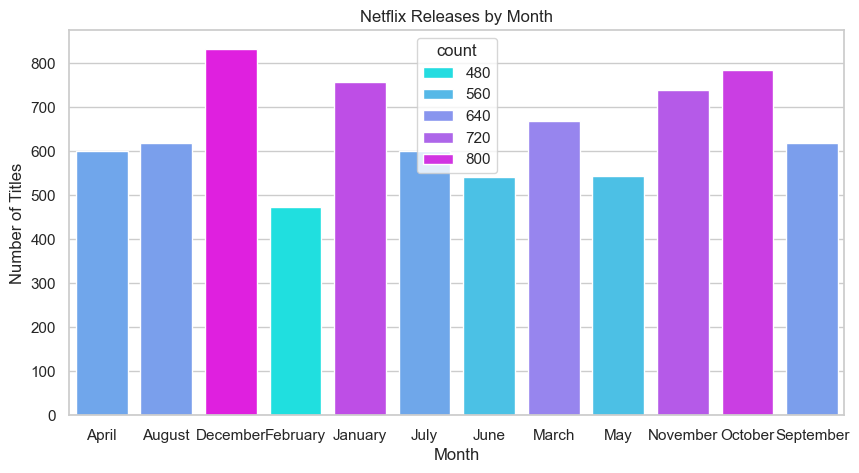

In [77]:
# Count releases per month
monthly_count = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_count.index,hue=monthly_count, y=monthly_count.values, palette='cool')
plt.title("Netflix Releases by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

#### Top 10 Directors by Number of Titles

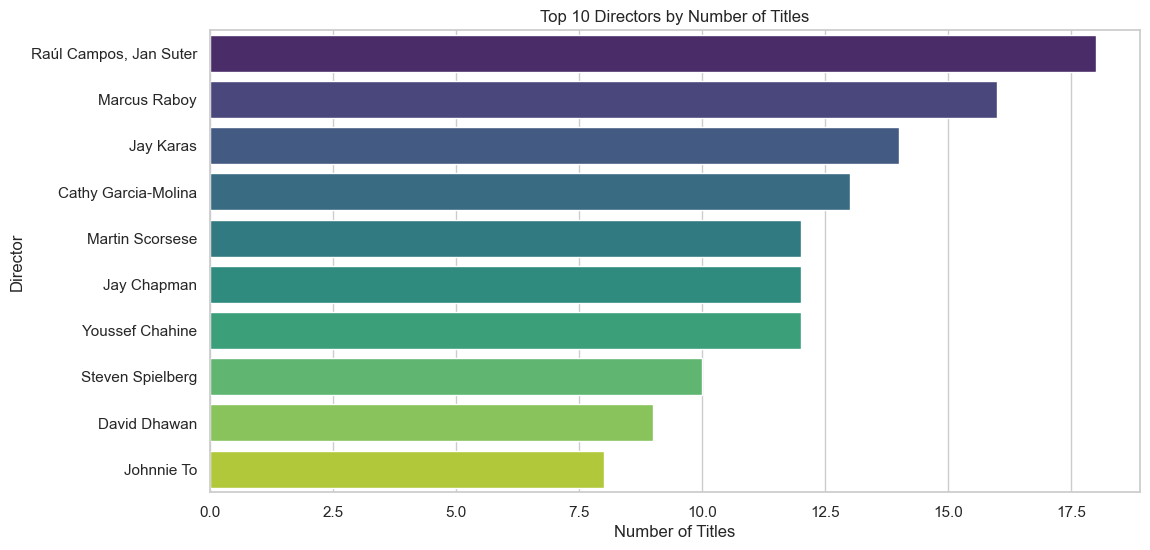

In [75]:
top_directors = df[df['Director'] != 'Not Available']['Director'].value_counts().head(10)
df_top = pd.DataFrame({'Director': top_directors.index, 'Count': top_directors.values})

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='Count', y='Director', palette='viridis', hue='Director', dodge=False, legend=False)
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


#### Distribution of Movie Durations

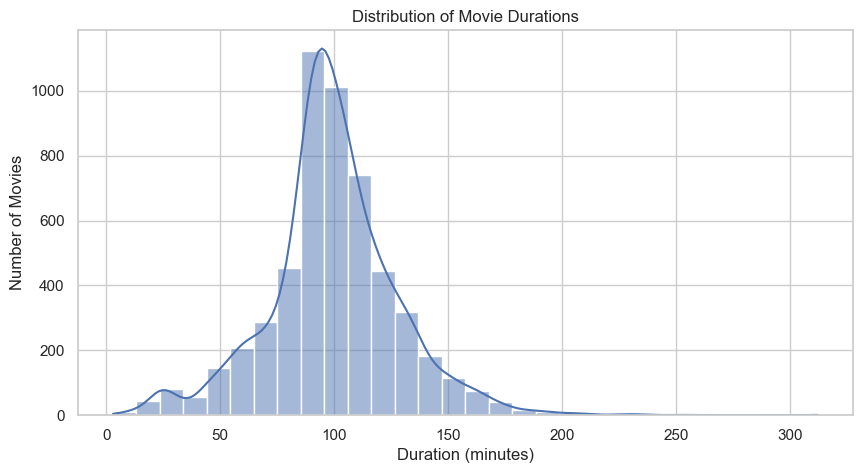

In [78]:
# Filter only Movies and convert duration to int
df_movies = df[df['Category']=='Movie'].copy()
df_movies['Duration'] = df_movies['Duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(10,5))
sns.histplot(df_movies['Duration'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


#### Ratings Distribution: Movies vs TV Shows

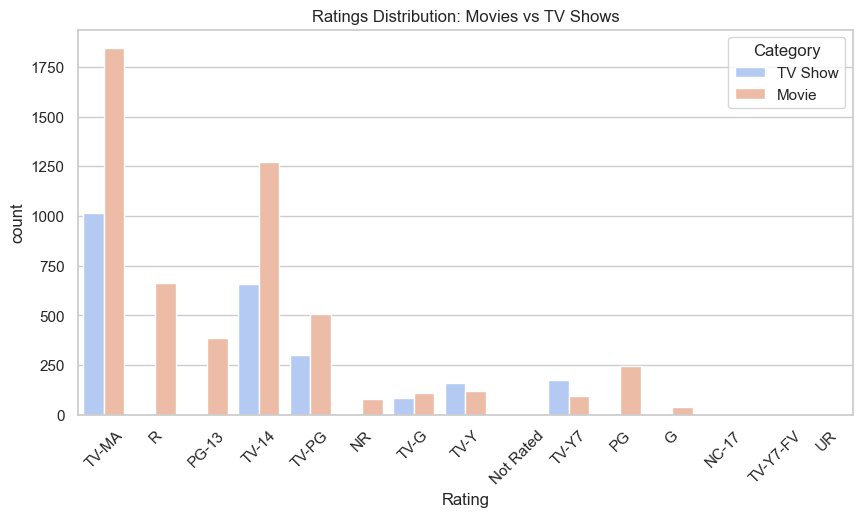

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', hue='Category', palette='coolwarm')
plt.title("Ratings Distribution: Movies vs TV Shows")
plt.xticks(rotation=45)
plt.show()


### Netfix Analysis Report

#### 1. Distribution of Movies vs TV Shows:
   - Observed that TV Shows have increased sharply since 2016, while Movies remained fairly stable.
   
#### 2. Most Common Genres:
   - International TV Shows, Drama, and Comedies dominate the catalog.
   - Some genres like Docuseries are least dominant.
   - International Movies, dramas and comedies surged fast in between 2018 and 2020

#### 3. Country-wise Contributions:
   - USA produces the highest number of titles, followed by India, United Kingdom, and Japan.
   
#### 4. Expected Outcomes

 1. **Understanding Netflix’s content strategy evolution**  
    - Shift from Movies to TV Shows after 2015.
    - Growth of international titles reflecting global expansion.

2. **Top-performing genres and categories**  
    - Most common genres: Drama, Comedies, International TV Shows.
    - Growing genres: Documentaries, International content.

3. **Strategic recommendations**  
    - Invest more in TV Shows and trending genres.
    - Expand family-friendly and teen-oriented content.
    - Focus on content from emerging markets to capture international subscribers.

Conclusion:
- Netflix’s content strategy is heavily focused on Movies and TV Shows.
- Recommendations: Invest in emerging genres, target international markets.
